In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
sales_df = pd.read_csv("retail_sales_dataset.csv")
menu_df = pd.read_csv("menu.csv")

# Display basic information
print("Sales Data Info:")
print(sales_df.info())
print("\nMenu Data Info:")
print(menu_df.info())

# Display first few rows
display(sales_df.head())
display(menu_df.head())


Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

Menu Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item     

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [2]:

# Convert 'Date' column to datetime format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Check for missing values
missing_values = sales_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Remove duplicates if any
sales_df = sales_df.drop_duplicates()
print(f"Data after removing duplicates: {sales_df.shape}")


Missing Values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Data after removing duplicates: (1000, 9)


In [3]:

# Descriptive statistics
sales_stats = sales_df.describe()
sales_modes = sales_df.mode().iloc[0]

print("Descriptive Statistics:")
display(sales_stats)
print("Mode of categorical columns:")
display(sales_modes)


Descriptive Statistics:


,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


Mode of categorical columns:


Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object

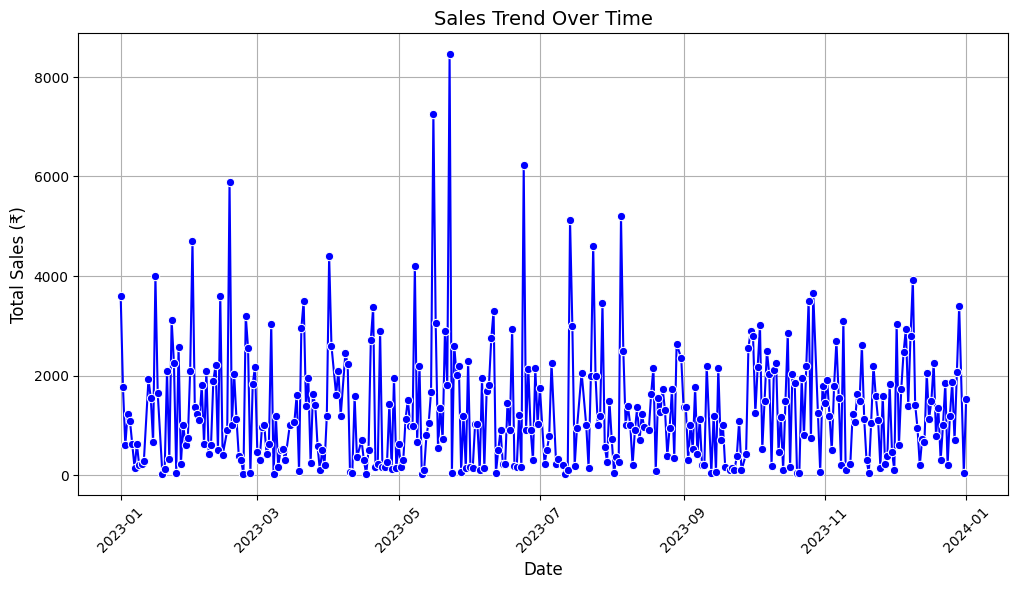

In [4]:

# Aggregate sales data by date
sales_trend = sales_df.groupby('Date')['Total Amount'].sum()

# Plot time series of total sales
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend.index, y=sales_trend.values, marker='o', color='b')
plt.title('Sales Trend Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\ajitm\AppData\Local\Temp\ipykernel_11564\3433049249.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="coolwarm")


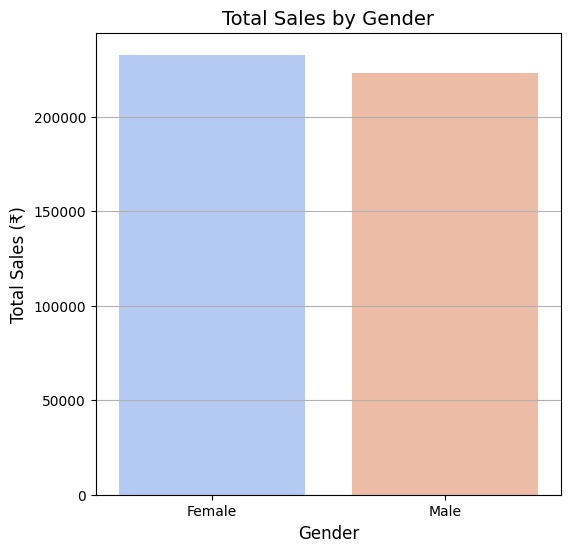

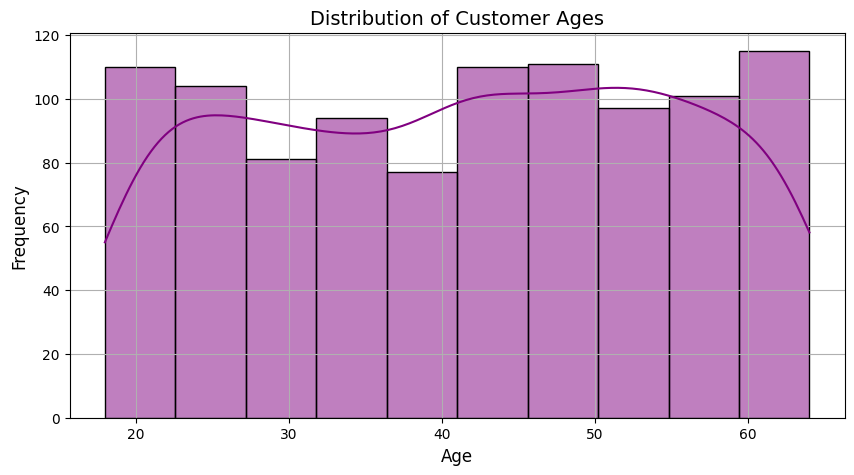

In [5]:

# Gender-based purchasing analysis
gender_sales = sales_df.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="coolwarm")
plt.title('Total Sales by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Sales (₹)', fontsize=12)
plt.grid(axis='y')
plt.show()

# Age-based purchasing analysis
plt.figure(figsize=(10, 5))
sns.histplot(sales_df['Age'], bins=10, kde=True, color='purple')
plt.title('Distribution of Customer Ages', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\ajitm\AppData\Local\Temp\ipykernel_11564\2869947808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")


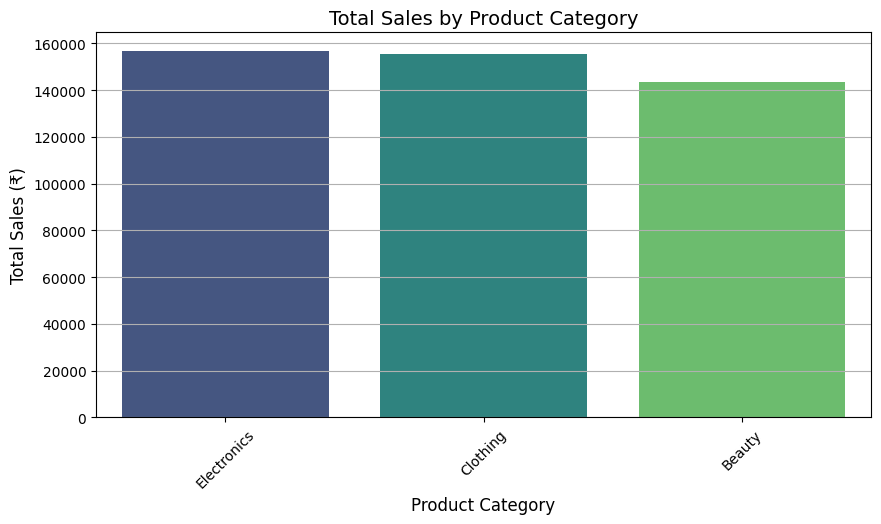

In [6]:

# Sales by product category
category_sales = sales_df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.title('Total Sales by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [7]:

# Heatmap to show correlations between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(sales_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


ValueError: could not convert string to float: 'CUST001'

<Figure size 800x600 with 0 Axes>

In [ ]:

recommendations = '''
1. **Focus on High-Selling Product Categories:** The top-selling categories should be promoted more with discounts.
2. **Target High-Spending Age Groups:** Advertisements and marketing campaigns should focus on the most active customer age range.
3. **Optimize Weekend Sales:** Sales trend shows potential peak sales on specific days; consider running promotions.
4. **Increase Gender-Specific Marketing:** If one gender dominates, customized marketing strategies should be applied.
5. **Monitor Pricing Strategy:** A strong correlation between price per unit and total amount suggests pricing adjustments can impact revenue.
'''
print("Actionable Recommendations:")
print(recommendations)
